In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import time
from scipy.stats import genextreme as gev
import openturns as ot
import openturns.viewer as viewer
import sympy

In [2]:
marathon_results = "Results_manchester_marathon_2022.xlsx" 

In [3]:
df = pd.read_excel (marathon_results,index_col='Chiptime', parse_dates=True)
#df = pd.read_excel (marathon_results)

In [4]:
print(df.columns)

Index(['Bib', 'Overall Position', 'Name', 'Category', 'Category Position',
       'Team / Club', 'Gender', 'Gender Position', 'Avg speed', 'Avg pace',
       'Status', 'Split - 10K - Duration', 'Split - 10K - Cumulative time',
       'Split - 10K - Rank', 'Split - Halfway - Duration',
       'Split - Halfway - Cumulative time', 'Split - Halfway - Rank',
       'Split - 30K - Duration', 'Split - 30K - Cumulative time',
       'Split - 30K - Rank', 'Split - Finish - Duration',
       'Split - Finish - Cumulative time'],
      dtype='object')


In [5]:
df

,Bib,Overall Position,Name,Category,Category Position,Team / Club,Gender,Gender Position,Avg speed,Avg pace,...,Split - 10K - Cumulative time,Split - 10K - Rank,Split - Halfway - Duration,Split - Halfway - Cumulative time,Split - Halfway - Rank,Split - 30K - Duration,Split - 30K - Cumulative time,Split - 30K - Rank,Split - Finish - Duration,Split - Finish - Cumulative time
Chiptime,,,,,,,,,,,,,,,,,,,,,
2022-05-02 02:18:40,1551,1.0,Fraser Stewart,SM,1.0,Cambuslang Harriers,m,2,11.34,05:18,...,00:32:20,4.0,00:36:08,01:08:28,1.0,00:28:49,01:37:16,2.0,00:41:24,02:18:40
2022-05-02 02:24:16,30307,2.0,George Phillips,SM,2.0,Notts AC,m,3,10.90,05:30,...,00:33:53,8.0,00:37:52,01:11:44,4.0,00:30:33,01:42:17,5.0,00:41:59,02:24:16
2022-05-02 02:24:30,1096,3.0,William Clarke,MV35,2.0,Barrow Runners,m,4,10.88,05:31,...,00:33:52,7.0,00:37:52,01:11:44,2.0,00:30:33,01:42:17,6.0,00:42:14,02:24:30
2022-05-02 02:24:54,30334,4.0,David Bishop,SM,3.0,Team Derby Runner,m,5,10.85,05:32,...,00:33:52,6.0,00:37:52,01:11:44,3.0,00:30:33,01:42:17,4.0,00:42:37,02:24:54
2022-05-02 02:24:59,1576,5.0,Eoghain McGinley,MV35,3.0,Letterkenny AC,m,6,10.84,05:32,...,00:33:51,5.0,00:37:53,01:11:43,5.0,00:30:34,01:42:16,7.0,00:42:43,02:24:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02 00:00:00,24397,NaN,Amy O'Sullivan,SW,1532.0,Team IP,f,4156,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-02 00:00:00,8131,NaN,Michael carolan,MV65,74.0,Brothers Pearse,m,10014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-02 00:00:00,2671,NaN,Rob Beves,MV55,558.0,Chepstow Harriers,m,10015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.drop(['Bib', 'Name','Team / Club', 'Avg speed', 'Avg pace', 'Status', 'Split - 10K - Duration', 'Split - 10K - Cumulative time',
       'Split - 10K - Rank', 'Split - Halfway - Duration',
       'Split - Halfway - Cumulative time', 'Split - Halfway - Rank',
       'Split - 30K - Duration', 'Split - 30K - Cumulative time',
       'Split - 30K - Rank', 'Split - Finish - Duration',
       'Split - Finish - Cumulative time'], axis=1, inplace=True)

In [7]:
df

,Overall Position,Category,Category Position,Gender,Gender Position
Chiptime,,,,,
2022-05-02 02:18:40,1.0,SM,1.0,m,2
2022-05-02 02:24:16,2.0,SM,2.0,m,3
2022-05-02 02:24:30,3.0,MV35,2.0,m,4
2022-05-02 02:24:54,4.0,SM,3.0,m,5
2022-05-02 02:24:59,5.0,MV35,3.0,m,6
...,...,...,...,...,...
2022-05-02 00:00:00,NaN,SW,1532.0,f,4156
2022-05-02 00:00:00,NaN,MV65,74.0,m,10014
2022-05-02 00:00:00,NaN,MV55,558.0,m,10015


In [8]:
#data = df[df.index != datetime.time(0, 0, 0)] # remove no times
data = df[df.index != datetime.datetime(2022,4,22,0, 0, 0)] # remove no times

In [9]:
data

,Overall Position,Category,Category Position,Gender,Gender Position
Chiptime,,,,,
2022-05-02 02:18:40,1.0,SM,1.0,m,2
2022-05-02 02:24:16,2.0,SM,2.0,m,3
2022-05-02 02:24:30,3.0,MV35,2.0,m,4
2022-05-02 02:24:54,4.0,SM,3.0,m,5
2022-05-02 02:24:59,5.0,MV35,3.0,m,6
...,...,...,...,...,...
2022-05-02 00:00:00,NaN,SW,1532.0,f,4156
2022-05-02 00:00:00,NaN,MV65,74.0,m,10014
2022-05-02 00:00:00,NaN,MV55,558.0,m,10015


In [10]:
data.dtypes

Overall Position     float64
Category              object
Category Position    float64
Gender                object
Gender Position        int64
dtype: object

In [11]:
data.index

DatetimeIndex(['2022-05-02 02:18:40', '2022-05-02 02:24:16',
               '2022-05-02 02:24:30', '2022-05-02 02:24:54',
               '2022-05-02 02:24:59', '2022-05-02 02:25:24',
               '2022-05-02 02:25:59', '2022-05-02 02:26:01',
               '2022-05-02 02:26:03', '2022-05-02 02:26:47',
               ...
               '2022-05-02 00:00:00', '2022-05-02 00:00:00',
               '2022-05-02 00:00:00', '2022-05-02 00:00:00',
               '2022-05-02 00:00:00', '2022-05-02 00:00:00',
               '2022-05-02 00:00:00', '2022-05-02 00:00:00',
               '2022-05-02 00:00:00', '2022-05-02 00:00:00'],
              dtype='datetime64[ns]', name='Chiptime', length=14173, freq=None)

<AxesSubplot:xlabel='Chiptime'>

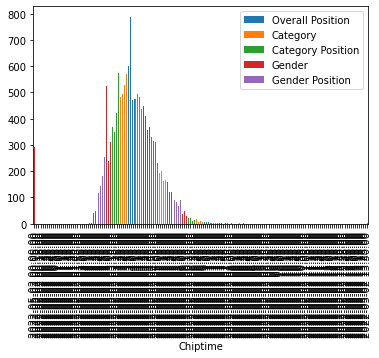

In [12]:
data.groupby(pd.Grouper(freq='5Min')).count().plot(kind='bar')

In [13]:
d = data.drop(['Category', 'Category Position',
        'Gender', 'Gender Position'], axis=1)


In [14]:
d['Occurrences'] = 1
d.drop(['Overall Position'], axis=1, inplace=True)

<AxesSubplot:xlabel='Chiptime'>

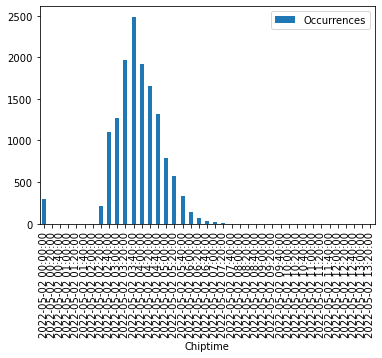

In [15]:
d.groupby(pd.Grouper(freq='20Min')).count().plot(kind='bar')

In [16]:
res = d.groupby(pd.Grouper(freq='20Min')).count()

In [17]:
res

,Occurrences
Chiptime,
2022-05-02 00:00:00,293
2022-05-02 00:20:00,0
2022-05-02 00:40:00,0
2022-05-02 01:00:00,0
2022-05-02 01:20:00,0
2022-05-02 01:40:00,0
2022-05-02 02:00:00,1
2022-05-02 02:20:00,210
2022-05-02 02:40:00,1105


In [18]:
d_clean = d.iloc[:-11 , :] # last value is way out

<AxesSubplot:xlabel='Chiptime'>

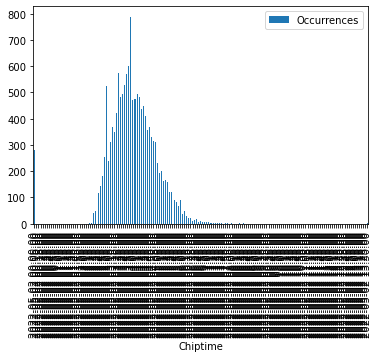

In [19]:
d_clean.groupby(pd.Grouper(freq='5Min')).count().plot(kind='bar')

In [20]:
res_clean = d_clean.groupby(pd.Grouper(freq='5Min')).count()
res_clean.describe()

,Occurrences
count,163.000000
mean,86.883436
std,167.834221
min,0.000000
25%,0.000000
50%,0.000000
75%,74.500000
max,789.000000


In [21]:
print(res_clean.to_markdown())

| Chiptime            |   Occurrences |
|:--------------------|--------------:|
| 2022-05-02 00:00:00 |           282 |
| 2022-05-02 00:05:00 |             0 |
| 2022-05-02 00:10:00 |             0 |
| 2022-05-02 00:15:00 |             0 |
| 2022-05-02 00:20:00 |             0 |
| 2022-05-02 00:25:00 |             0 |
| 2022-05-02 00:30:00 |             0 |
| 2022-05-02 00:35:00 |             0 |
| 2022-05-02 00:40:00 |             0 |
| 2022-05-02 00:45:00 |             0 |
| 2022-05-02 00:50:00 |             0 |
| 2022-05-02 00:55:00 |             0 |
| 2022-05-02 01:00:00 |             0 |
| 2022-05-02 01:05:00 |             0 |
| 2022-05-02 01:10:00 |             0 |
| 2022-05-02 01:15:00 |             0 |
| 2022-05-02 01:20:00 |             0 |
| 2022-05-02 01:25:00 |             0 |
| 2022-05-02 01:30:00 |             0 |
| 2022-05-02 01:35:00 |             0 |
| 2022-05-02 01:40:00 |             0 |
| 2022-05-02 01:45:00 |             0 |
| 2022-05-02 01:50:00 |             0 |


In [22]:
df_1= pd.read_excel (marathon_results)

In [23]:
df_1.drop(['Bib', 'Name','Team / Club', 'Avg speed', 'Avg pace', 'Status', 'Split - 10K - Duration', 'Split - 10K - Cumulative time',
       'Split - 10K - Rank', 'Split - Halfway - Duration',
       'Split - Halfway - Cumulative time', 'Split - Halfway - Rank',
       'Split - 30K - Duration', 'Split - 30K - Cumulative time',
       'Split - 30K - Rank', 'Split - Finish - Duration',
       'Split - Finish - Cumulative time'], axis=1, inplace=True)

In [24]:
df_1

,Overall Position,Chiptime,Category,Category Position,Gender,Gender Position
0,1.0,02:18:40,SM,1.0,m,2
1,2.0,02:24:16,SM,2.0,m,3
2,3.0,02:24:30,MV35,2.0,m,4
3,4.0,02:24:54,SM,3.0,m,5
4,5.0,02:24:59,MV35,3.0,m,6
...,...,...,...,...,...,...
14168,NaN,00:00:00,SW,1532.0,f,4156
14169,NaN,00:00:00,MV65,74.0,m,10014
14170,NaN,00:00:00,MV55,558.0,m,10015
14171,NaN,00:00:00,MV60,201.0,m,10016


In [25]:
display(df_1.dtypes)

Overall Position     float64
Chiptime              object
Category              object
Category Position    float64
Gender                object
Gender Position        int64
dtype: object

In [26]:
print("Type of Names Column : ", type(df_1.iloc[:, 0]))

Type of Names Column :  <class 'pandas.core.series.Series'>


In [27]:
print("Type of Names Column Element : ", type(df_1.iloc[:, 1][2]))

Type of Names Column Element :  <class 'datetime.time'>


In [28]:
print(f"time/date: {df_1.iloc[1][1]}")

time/date: 02:24:16


In [29]:
#df_1["Chiptime"] = pd.to_datetime(df_1["Chiptime"])
df_1['seconds'] = [(val.hour*60+val.minute)*60 + val.second for val in df_1['Chiptime']]

In [30]:
df_1['seconds']

0        8320
1        8656
2        8670
3        8694
4        8699
         ... 
14168       0
14169       0
14170       0
14171       0
14172       0
Name: seconds, Length: 14173, dtype: int64

In [31]:
df_1_clean = df_1[df_1['Chiptime'] != datetime.time(0, 0, 0)] # remove no times

In [32]:
df_1_clean

,Overall Position,Chiptime,Category,Category Position,Gender,Gender Position,seconds
0,1.0,02:18:40,SM,1.0,m,2,8320
1,2.0,02:24:16,SM,2.0,m,3,8656
2,3.0,02:24:30,MV35,2.0,m,4,8670
3,4.0,02:24:54,SM,3.0,m,5,8694
4,5.0,02:24:59,MV35,3.0,m,6,8699
...,...,...,...,...,...,...,...
13875,13876.0,07:51:26,FV45,577.0,f,4084,28286
13876,13877.0,08:04:35,FV60,76.0,f,4085,29075
13877,13878.0,08:23:22,SW,1511.0,f,4086,30202
13878,13879.0,08:32:31,SM,3565.0,m,9794,30751


In [33]:
#seconds_in_2_hrs = 60*60*2
#df_1_clean['sec_2hr'] = df_1_clean['seconds'] - seconds_in_2_hrs

In [34]:
#df_1_clean

In [35]:
#df_1_clean['add_secs'] = df_1_clean['seconds'] - df_1_clean['seconds'][0]

In [36]:
#df_1_clean

In [37]:
#df_1_clean['add_secs'].describe()

In [38]:
#mean_add = df_1_clean['add_secs'].mean()

In [39]:
#mean_add

In [40]:
#mean_stddev = df_1_clean['seconds'].std()
#print(f'mean HH:MM:SS {time.strftime("%H:%M:%S", time.gmtime(mean_stddev))}')

In [41]:
#mean_secs = df_1_clean['seconds'].mean()
#print(f'mean = {time.strftime("%H:%M:%S", time.gmtime(mean_secs))}')

In [42]:
#stddev_secs = df_1_clean['seconds'].std()
#print(f'std dev = {time.strftime("%H:%M:%S", time.gmtime(stddev_secs))}')

In [43]:
print(df_1_clean['Category'].unique())

['SM' 'MV35' 'MV40' nan 'MV60' 'MV45' 'MV50' 'MV55' 'SW' 'FV45' 'FV35'
 'FV50' 'FV40' 'All Male' 'MV65' 'TBC' 'FV60' 'FV55' 'FV65' 'MV70+'
 'FV70+']


## MV45

In [44]:
df_mv45 = df_1_clean.loc[df_1_clean['Category'] == 'MV45']
df_mv45

,Overall Position,Chiptime,Category,Category Position,Gender,Gender Position,seconds
49,50.0,02:30:15,MV45,1.0,m,51,9015
96,97.0,02:35:06,MV45,2.0,m,98,9306
97,98.0,02:35:12,MV45,3.0,m,99,9312
98,99.0,02:35:14,MV45,4.0,m,100,9314
136,137.0,02:37:20,MV45,5.0,m,138,9440
...,...,...,...,...,...,...,...
13688,13689.0,06:08:45,MV45,1241.0,m,9713,22125
13727,13728.0,06:12:53,MV45,1242.0,m,9730,22373
13789,13790.0,06:30:21,MV45,1243.0,m,9755,23421
13853,13854.0,07:03:49,MV45,1244.0,m,9786,25429


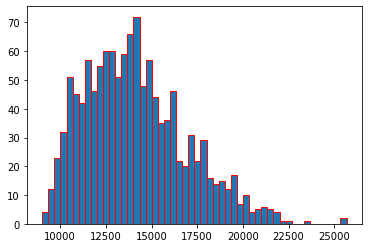

In [45]:
n,bins,patches = plt.hist(df_mv45['seconds'], edgecolor="red", bins=50)

In [46]:
bins

array([ 9015.  ,  9348.02,  9681.04, 10014.06, 10347.08, 10680.1 ,
       11013.12, 11346.14, 11679.16, 12012.18, 12345.2 , 12678.22,
       13011.24, 13344.26, 13677.28, 14010.3 , 14343.32, 14676.34,
       15009.36, 15342.38, 15675.4 , 16008.42, 16341.44, 16674.46,
       17007.48, 17340.5 , 17673.52, 18006.54, 18339.56, 18672.58,
       19005.6 , 19338.62, 19671.64, 20004.66, 20337.68, 20670.7 ,
       21003.72, 21336.74, 21669.76, 22002.78, 22335.8 , 22668.82,
       23001.84, 23334.86, 23667.88, 24000.9 , 24333.92, 24666.94,
       24999.96, 25332.98, 25666.  ])

In [47]:
mv45_results = ot.Sample([[p] for p in df_mv45['seconds']])
mv45_distribution = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(mv45_results)
print(mv45_distribution)

GeneralizedExtremeValue(mu=12867.7, sigma=2305.37, xi=-0.0527831)


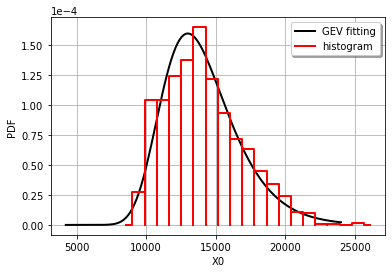

In [48]:
graph = mv45_distribution.drawPDF()
graph.add(ot.HistogramFactory().build(mv45_results).drawPDF())
graph.setColors(["black", "red"])
graph.setLegends(["GEV fitting", "histogram"])
graph.setLegendPosition("topright")

view = viewer.View(graph)
axes = view.getAxes()
#_ = axes[0].set_xlim(-20.0, 20.0)

In [49]:
print(mv45_distribution.getActualDistribution())

WeibullMax(beta = 43676.3, alpha = 18.9455, gamma = 56544.1)


### Weibull distribution

In [50]:
mean_45 = mv45_distribution.getMean()
sigma_45 = mv45_distribution.getSigma() # location
mu_45 = mv45_distribution.getMu() # scale
xi_45 = mv45_distribution.getXi() # shape
std_dev_45 = mv45_distribution.getStandardDeviation()

In [51]:
print(f'mean MV45 = {mean_45}')
print(f'std dev MV45 = {std_dev_45}')
print(f'location MV45 = {sigma_45}')
print(f'scale MV45 = {mu_45}')
print(f'shape MV45 = {xi_45}')

mean MV45 = [14083.6]
std dev MV45 = [2773.12]
location MV45 = 2305.3719550623673
scale MV45 = 12867.742962766431
shape MV45 = -0.05278309395168619


In [52]:
mv45_std_dev_time = mean_45 - std_dev_45
print('Weibull distribution')
print(f'mean MV45 = {time.strftime("%H:%M:%S", time.gmtime(int(mean_45[0])))}')
print(f'std dev MV45 = {time.strftime("%H:%M:%S", time.gmtime(int(std_dev_45[0])))}')
print(f'time at 1 std dev MV45 = {time.strftime("%H:%M:%S", time.gmtime(int(mv45_std_dev_time[0])))}')

Weibull distribution
mean MV45 = 03:54:43
std dev MV45 = 00:46:13
time at 1 std dev MV45 = 03:08:30


###  Gumbel distribution (with shape ~0 this could be a Gumbel)

In [53]:
gumbel_var = ((np.pi**2)/6)*sigma_45**2 # see wiki for variance of a gumbel plot. Here 2305.37 is scale parameter
gumbel_stddev = np.sqrt(gumbel_var)

In [54]:
gumbel_mean = mu_45 + sigma_45*sympy.EulerGamma.evalf() # see wiki on mean calculation of Gumbel distribution

In [55]:
print(f'mean MV45 = {time.strftime("%H:%M:%S", time.gmtime(int(gumbel_mean)))}')
print(f'var MV45 = {time.strftime("%H:%M:%S", time.gmtime(gumbel_var))}')
print(f'std dev MV45 = {time.strftime("%H:%M:%S", time.gmtime(gumbel_stddev))}')

mean MV45 = 03:56:38
var MV45 = 04:26:36
std dev MV45 = 00:49:16


In [56]:
sympy.EulerGamma.evalf()

0.577215664901533

In [57]:
g_std_dev_1_time = gumbel_mean - gumbel_stddev
print('Gumbel distribution')
print(f'mean MV45 = {time.strftime("%H:%M:%S", time.gmtime(int(gumbel_mean)))}')
print(f'std dev MV45 = {time.strftime("%H:%M:%S", time.gmtime(int(gumbel_stddev)))}')
print(f'time at 1 std dev MV45 = {time.strftime("%H:%M:%S", time.gmtime(int(g_std_dev_1_time)))}')

Gumbel distribution
mean MV45 = 03:56:38
std dev MV45 = 00:49:16
time at 1 std dev MV45 = 03:07:21


### As a normal distribution

In [58]:
mean_secs_mv45 = df_mv45['seconds'].mean()
stddev_secs_mv45 = df_mv45['seconds'].std()
std_dev_1_time = mean_secs_mv45 - stddev_secs_mv45

In [59]:
print('Normal distribution')
print(f'mean MV 45 = {time.strftime("%H:%M:%S", time.gmtime(mean_secs_mv45))}')
print(f'std dev MV45 = {time.strftime("%H:%M:%S", time.gmtime(stddev_secs_mv45))}')
print(f'1 std dev time MV45 = {time.strftime("%H:%M:%S", time.gmtime(std_dev_1_time))}')

Normal distribution
mean MV 45 = 03:54:57
std dev MV45 = 00:46:05
1 std dev time MV45 = 03:08:52


## Males

In [60]:
df_male = df_1_clean.loc[df_1_clean['Gender'] == 'm']
#df_male = df_1_clean.loc[df_1_clean['Category'].str.contains('M', na=False)]
df_male

,Overall Position,Chiptime,Category,Category Position,Gender,Gender Position,seconds
0,1.0,02:18:40,SM,1.0,m,2,8320
1,2.0,02:24:16,SM,2.0,m,3,8656
2,3.0,02:24:30,MV35,2.0,m,4,8670
3,4.0,02:24:54,SM,3.0,m,5,8694
4,5.0,02:24:59,MV35,3.0,m,6,8699
...,...,...,...,...,...,...,...
13864,13865.0,07:16:55,MV50,929.0,m,9791,26215
13867,13868.0,07:20:38,MV50,930.0,m,9792,26438
13868,13869.0,07:20:38,SM,3564.0,m,9793,26438
13878,13879.0,08:32:31,SM,3565.0,m,9794,30751


### Remove the last result as it is 5 hours after the next last result!

In [66]:
df_male = df_male[:-1]

### get distribution and type

In [67]:
male_results = ot.Sample([[p] for p in df_male['seconds']])
male_distribution = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(male_results)
print(male_distribution)
print(male_distribution.getActualDistribution())

GeneralizedExtremeValue(mu=12909.5, sigma=2422.94, xi=-0.0721008)
WeibullMax(beta = 33604.9, alpha = 13.8695, gamma = 46514.3)


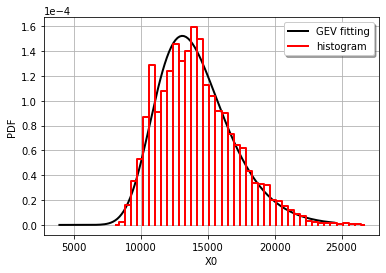

In [68]:
graph = male_distribution.drawPDF()
graph.add(ot.HistogramFactory().build(male_results).drawPDF())
graph.setColors(["black", "red"])
graph.setLegends(["GEV fitting", "histogram"])
graph.setLegendPosition("topright")

view = viewer.View(graph)
axes = view.getAxes()
#_ = axes[0].set_xlim(-20.0, 20.0)

In [69]:
mean_male = male_distribution.getMean()
sigma_male = male_distribution.getSigma() # location
mu_male = male_distribution.getMu() # scale
xi_male = male_distribution.getXi() # shape
std_dev_male = male_distribution.getStandardDeviation()

In [71]:
male_std_dev_time = mean_male - std_dev_male
print(male_distribution.getActualDistribution())
print(f'mean male = {time.strftime("%H:%M:%S", time.gmtime(int(mean_male[0])))}')
print(f'std dev male = {time.strftime("%H:%M:%S", time.gmtime(int(std_dev_male[0])))}')
print(f'time at 1 std dev male = {time.strftime("%H:%M:%S", time.gmtime(int(male_std_dev_time[0])))}')

WeibullMax(beta = 33604.9, alpha = 13.8695, gamma = 46514.3)
mean male = 03:55:45
std dev male = 00:47:33
time at 1 std dev male = 03:08:12


## Female FV45

In [72]:
df_fv45 = df_1_clean.loc[df_1_clean['Category'] == 'FV45']
df_fv45

,Overall Position,Chiptime,Category,Category Position,Gender,Gender Position,seconds
458,459.0,02:48:33,FV45,1.0,f,2,10113
562,563.0,02:50:30,FV45,2.0,f,9,10230
697,698.0,02:53:40,FV45,3.0,f,18,10420
791,792.0,02:55:03,FV45,4.0,f,28,10503
988,989.0,02:57:19,FV45,5.0,f,45,10639
...,...,...,...,...,...,...,...
13857,13858.0,07:07:38,FV45,573.0,f,4072,25658
13860,13861.0,07:09:40,FV45,574.0,f,4074,25780
13865,13866.0,07:17:23,FV45,575.0,f,4076,26243
13871,13872.0,07:31:00,FV45,576.0,f,4080,27060


In [77]:
fv45_results = ot.Sample([[p] for p in df_fv45['seconds']])
fv45_distribution = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(fv45_results)
print(fv45_distribution)
print(fv45_distribution.getActualDistribution())

GeneralizedExtremeValue(mu=14833.9, sigma=2577.61, xi=-0.112525)
WeibullMax(beta = 22907, alpha = 8.88692, gamma = 37740.9)


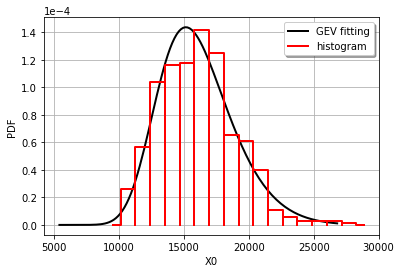

In [78]:
graph = fv45_distribution.drawPDF()
graph.add(ot.HistogramFactory().build(fv45_results).drawPDF())
graph.setColors(["black", "red"])
graph.setLegends(["GEV fitting", "histogram"])
graph.setLegendPosition("topright")

view = viewer.View(graph)
axes = view.getAxes()
#_ = axes[0].set_xlim(-20.0, 20.0)

In [79]:
mean_fv45 = fv45_distribution.getMean()
sigma_fv45 = fv45_distribution.getSigma() # location
mu_fv45 = fv45_distribution.getMu() # scale
xi_fv45 = fv45_distribution.getXi() # shape
std_dev_fv45 = fv45_distribution.getStandardDeviation()

In [81]:
fv45_std_dev_time = mean_fv45 - std_dev_fv45
print(fv45_distribution.getActualDistribution())
print(f'mean male = {time.strftime("%H:%M:%S", time.gmtime(int(mean_fv45[0])))}')
print(f'std dev male = {time.strftime("%H:%M:%S", time.gmtime(int(std_dev_fv45[0])))}')
print(f'time at 1 std dev fv45 = {time.strftime("%H:%M:%S", time.gmtime(int(fv45_std_dev_time[0])))}')

WeibullMax(beta = 22907, alpha = 8.88692, gamma = 37740.9)
mean male = 04:27:41
std dev male = 00:48:34
time at 1 std dev fv45 = 03:39:06
